In [64]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py

In [65]:
def avg_time(wt):
    avg_time = np.mean(wt)
    std_time = np.std(wt)
    return (avg_time, std_time)

In [66]:
# Get all digits from filenames
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

In [67]:
# get digits from the filenames.
def get_all_digits(strn):
    digit_str = []
    for ch in strn:
        if ch.isdigit():
            digit_str.append(ch)
    return ''.join(digit_str)

def get_num_threads(fnames):
    num_nodes = np.array([int(get_all_digits(strn.replace('.h5', ''))) for strn in fnames])
    return num_nodes

In [93]:
def analyze_case(filenames):
    h5_files = [h5py.File(fn) for fn in filenames]
    print(list(h5_files[0].keys()))
    all_walltimes = [hf["walltimes"][()] for hf in h5_files]
    average_times = []
    std_times = []
    for wt in all_walltimes:
        time_avg, time_std = avg_time(wt)
        average_times.append(time_avg)
        std_times.append(time_std)
    results = {}
    results["step_times"] = [np.mean(h5py.File(f)["step_times"][()]) for f in filenames]
    results["averaging_times"] = [np.mean(h5py.File(f)["averaging_times"])[()] for f in filenames]
    results["total_times"] = [hf["total_walltime"][0] for hf in h5_files]
    results["num_threads"] = get_num_threads(filenames)
    results["average_times"] = np.array(average_times)
    results["std_times"] = np.array(std_times)
    return results

In [94]:
dir = "../data"
data_files = os.listdir(dir)

thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "case_two" not in s and "simd" not in s]
h5_filenames = [dir + '/' + f for f in thread_files]
print(h5_filenames)

simd_thread_files = [s for s in data_files if "thread_scaling_simd" in s and "h5" in s]
simd_h5_filenames = [dir + '/' + f for f in simd_thread_files]
print(simd_h5_filenames)

case_two_thread_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "case_two" in s and "simd" not in s]
case_two_h5_filenames = [dir + '/' + f for f in case_two_thread_files]
print(case_two_h5_filenames)

case_two_simd_files = [s for s in data_files if "thread_scaling_" in s and "h5" in s and "simd" in s and "case_two" in s]
case_two_simd_h5_filenames = [dir + '/' + f for f in case_two_simd_files]
print(case_two_simd_h5_filenames)

['../data/thread_scaling_8.h5', '../data/thread_scaling_2.h5', '../data/thread_scaling_16.h5', '../data/thread_scaling_4.h5', '../data/thread_scaling_1.h5']
['../data/thread_scaling_simd_16.h5', '../data/thread_scaling_simd_2.h5', '../data/thread_scaling_simd_8.h5', '../data/thread_scaling_simd_1.h5', '../data/thread_scaling_simd_4.h5']
['../data/thread_scaling_case_two_1.h5', '../data/thread_scaling_case_two_4.h5', '../data/thread_scaling_case_two_2.h5', '../data/thread_scaling_case_two_8.h5', '../data/thread_scaling_case_two_16.h5']
['../data/thread_scaling_case_two_simd_4.h5', '../data/thread_scaling_case_two_simd_16.h5', '../data/thread_scaling_case_two_simd_1.h5', '../data/thread_scaling_case_two_simd_8.h5', '../data/thread_scaling_case_two_simd_2.h5']


In [95]:
results = analyze_case(h5_filenames)
simd_results = analyze_case(simd_h5_filenames)
case_two_results = analyze_case(case_two_h5_filenames)
case_two_simd_results = analyze_case(case_two_simd_h5_filenames)

['averaging_times', 'bose_model', 'init_population', 'num_points', 'num_samples', 'population', 'step_times', 'time_steps', 'total_walltime', 'use_simd', 'walltimes']
['averaging_times', 'bose_model', 'init_population', 'num_points', 'num_samples', 'population', 'step_times', 'time_steps', 'total_walltime', 'use_simd', 'walltimes']
['averaging_times', 'bose_model', 'init_population', 'num_points', 'num_samples', 'population', 'step_times', 'time_steps', 'total_walltime', 'use_simd', 'walltimes']
['averaging_times', 'bose_model', 'init_population', 'num_points', 'num_samples', 'population', 'step_times', 'time_steps', 'total_walltime', 'use_simd', 'walltimes']


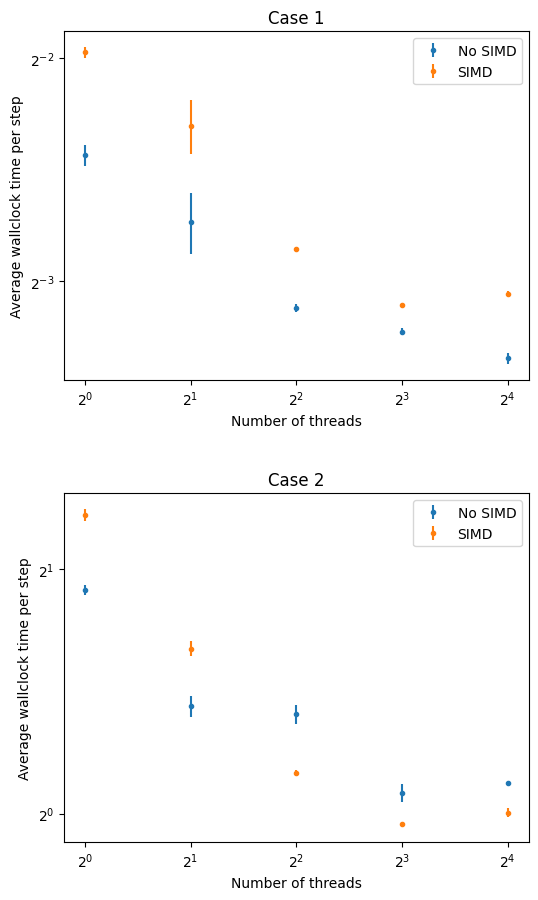

In [96]:
fig, ax = plt.subplots(2, 1)
fig.set_figwidth(6.0)
fig.set_figheight(11.0)
ax[0].set_box_aspect(0.75)
ax[1].set_box_aspect(0.75)

ax[0].set_title("Case 1")
ax[1].set_title("Case 2")

ax[0].set_xscale('log', base=2)
ax[1].set_xscale('log', base=2)
ax[0].set_yscale('log', base=2)
ax[1].set_yscale('log', base=2)

ax[0].errorbar(np.array(results["num_threads"]), results["average_times"], yerr=results["std_times"], \
            linestyle='', marker='.', label="No SIMD")
ax[0].set_xlabel("Number of threads")

ax[0].errorbar(np.array(simd_results["num_threads"]), simd_results["average_times"], yerr=simd_results["std_times"], \
            linestyle='', marker='.', label="SIMD")

ax[1].errorbar(np.array(case_two_results["num_threads"]), case_two_results["average_times"], yerr=case_two_results["std_times"], \
            linestyle='', marker='.', label="No SIMD")
ax[1].set_xlabel("Number of threads")

ax[1].errorbar(np.array(case_two_simd_results["num_threads"]), case_two_simd_results["average_times"], yerr=case_two_simd_results["std_times"], \
            linestyle='', marker='.', label="SIMD")

ax[0].set_xlabel("Number of threads")
ax[0].set_ylabel("Average wallclock time per step")
ax[1].set_ylabel("Average wallclock time per step")
ax[0].legend()
ax[1].legend()

plt.savefig("../plots/thread_scaling_steps.png")

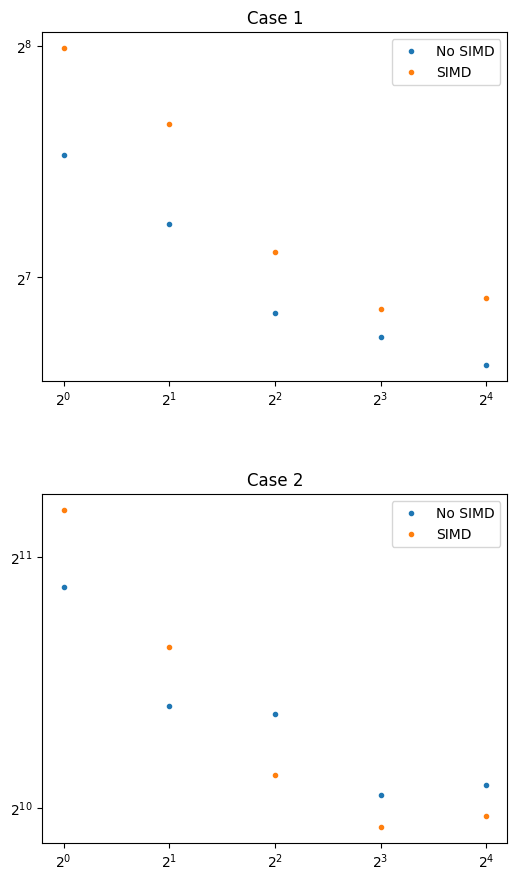

In [97]:
fig2, ax2 = plt.subplots(2, 1)
fig2.set_figwidth(6.0)
fig2.set_figheight(11.0)
ax2[0].set_box_aspect(0.75)
ax2[1].set_box_aspect(0.75)

ax2[0].set_title("Case 1")
ax2[1].set_title("Case 2")

ax2[0].set_xscale('log', base=2)
ax2[1].set_xscale('log', base=2)
ax2[0].set_yscale('log', base=2)
ax2[1].set_yscale('log', base=2)

ax2[0].plot(results["num_threads"], results["total_times"], '.', label="No SIMD")
ax2[0].plot(simd_results["num_threads"], simd_results["total_times"], '.', label="SIMD")
ax2[0].legend()

ax2[1].plot(case_two_results["num_threads"], case_two_results["total_times"], '.', label="No SIMD")
ax2[1].plot(case_two_simd_results["num_threads"], case_two_simd_results["total_times"], '.', label="SIMD")
ax2[1].legend()

plt.savefig("../plots/threads_total_walltime.png")

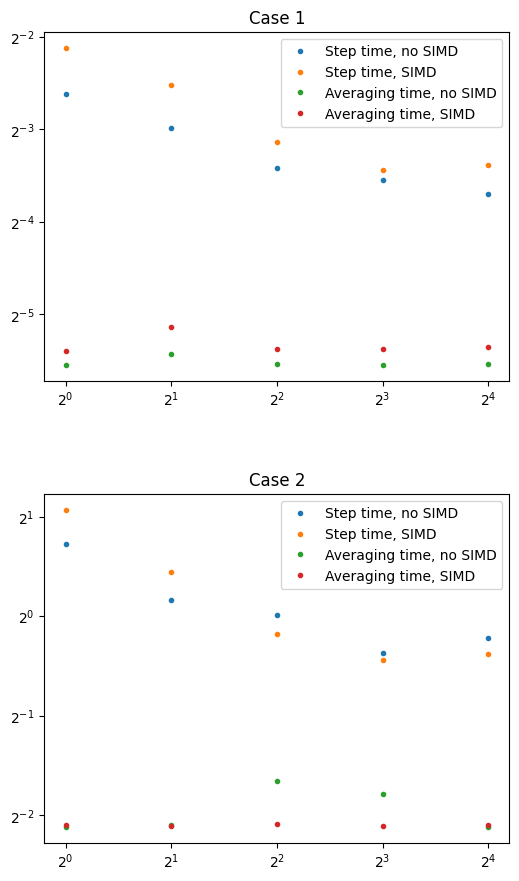

In [105]:
fig3, ax3 = plt.subplots(2, 1)
fig3.set_figwidth(6.0)
fig3.set_figheight(11.0)
ax3[0].set_box_aspect(0.75)
ax3[1].set_box_aspect(0.75)

ax3[0].set_title("Case 1")
ax3[1].set_title("Case 2")

ax3[0].set_xscale('log', base=2)
ax3[1].set_xscale('log', base=2)
ax3[0].set_yscale('log', base=2)
ax3[1].set_yscale('log', base=2)

ax3[0].plot(results["num_threads"], results["step_times"], '.', label="Step time, no SIMD")
ax3[0].plot(simd_results["num_threads"], simd_results["step_times"], '.', label="Step time, SIMD")
ax3[0].plot(results["num_threads"], results["averaging_times"], '.', label="Averaging time, no SIMD")
ax3[0].plot(simd_results["num_threads"], simd_results["averaging_times"], '.', label="Averaging time, SIMD")
ax3[0].legend()

ax3[1].plot(case_two_results["num_threads"], case_two_results["step_times"], '.', label="Step time, no SIMD")
ax3[1].plot(case_two_simd_results["num_threads"], case_two_simd_results["step_times"], '.', label="Step time, SIMD")
ax3[1].plot(case_two_results["num_threads"], case_two_results["averaging_times"], '.', label="Averaging time, no SIMD")
ax3[1].plot(case_two_simd_results["num_threads"], case_two_simd_results["averaging_times"], '.', label="Averaging time, SIMD")
ax3[1].legend()

plt.savefig("../plots/thread_averaging_vs_stepping.png")